In [1]:
# Import necessary libraries
import pandas as pd
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

In [2]:
# Read the Excel file
file_path = "/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Data files_Junbo/Data_Network/handle.xlsx"
df = pd.read_excel(file_path)  # Load the Excel file into a DataFrame

# Initialize a nested dictionary to store the statistics
# Format: {Year: {Institution: {Research Category: Count}}}
result = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

# Iterate through each row of data
for index, row in df.iterrows():
    year = row['year']  # Extract the year from the current row
    institutions = row['institutions'].split(';')  # Split institutions by ';' to get a list
    categories = row['Predicted_Categories'].split(',')  # Split research categories by ',' to get a list
    
    # Count the number of publications per institution, year, and research category
    for institution in institutions:
        institution = institution.strip()  # Remove leading and trailing spaces
        for category in categories:
            category = category.strip()  # Remove leading and trailing spaces
            result[year][institution][category] += 1  # Update the count in the nested dictionary

# Convert the results into a DataFrame for output
output_data = []  # Initialize an empty list to store the final output data

# Iterate through the nested dictionary to extract year, institution, research category, and count
for year, institutions in result.items():
    for institution, categories in institutions.items():
        for category, count in categories.items():
            output_data.append([year, institution, category, count])  # Append results to the list

# Create an output DataFrame
output_df = pd.DataFrame(output_data, columns=['Year', 'Institution', 'Predicted_Category', 'Count'])

# Save the results to a new Excel file
output_file_path = "/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/tempdata/Institution_Statistics.xlsx"
output_df.to_excel(output_file_path, index=False)  # Save the DataFrame as an Excel file

print(f"Statistics have been saved to: {output_file_path}")


Statistics have been saved to: /Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/tempdata/Institution_Statistics.xlsx


In [3]:
# Read the Excel file
file_path = "/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Data files_Junbo/Data_Network/Sample_ICML_institutions.xlsx"
df = pd.read_excel(file_path)  # Load the Excel file into a DataFrame

# Initialize a nested dictionary to store the statistics
# Format: {Year: {Institution: {Research Category: Count}}}
result = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

# Iterate through each row of data
for index, row in df.iterrows():
    year = row['year']  # Extract the year from the current row
    institutions = row['institutions'].split(';')  # Split institutions by ';' to get a list
    categories = row['Predicted_Categories'].split(',')  # Split research categories by ',' to get a list
    
    # Count the number of publications per institution, year, and research category
    for institution in institutions:
        institution = institution.strip()  # Remove leading and trailing spaces
        for category in categories:
            category = category.strip()  # Remove leading and trailing spaces
            result[year][institution][category] += 1  # Update the count in the nested dictionary

# Convert the results into a DataFrame for output
output_data = []  # Initialize an empty list to store the final output data

# Iterate through the nested dictionary to extract year, institution, research category, and count
for year, institutions in result.items():
    for institution, categories in institutions.items():
        for category, count in categories.items():
            output_data.append([year, institution, category, count])  # Append results to the list

# Create an output DataFrame
output_df = pd.DataFrame(output_data, columns=['Year', 'Institution', 'Predicted_Category', 'Count'])

# Save the results to a new Excel file
output_file_path = "/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/tempdata/Institution_Statistics1.xlsx"
output_df.to_excel(output_file_path, index=False)  # Save the DataFrame as an Excel file

print(f"Statistics have been saved to: {output_file_path}")


Statistics have been saved to: /Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/tempdata/Institution_Statistics1.xlsx


Image has been saved to: /Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/Picture/handle_network.png


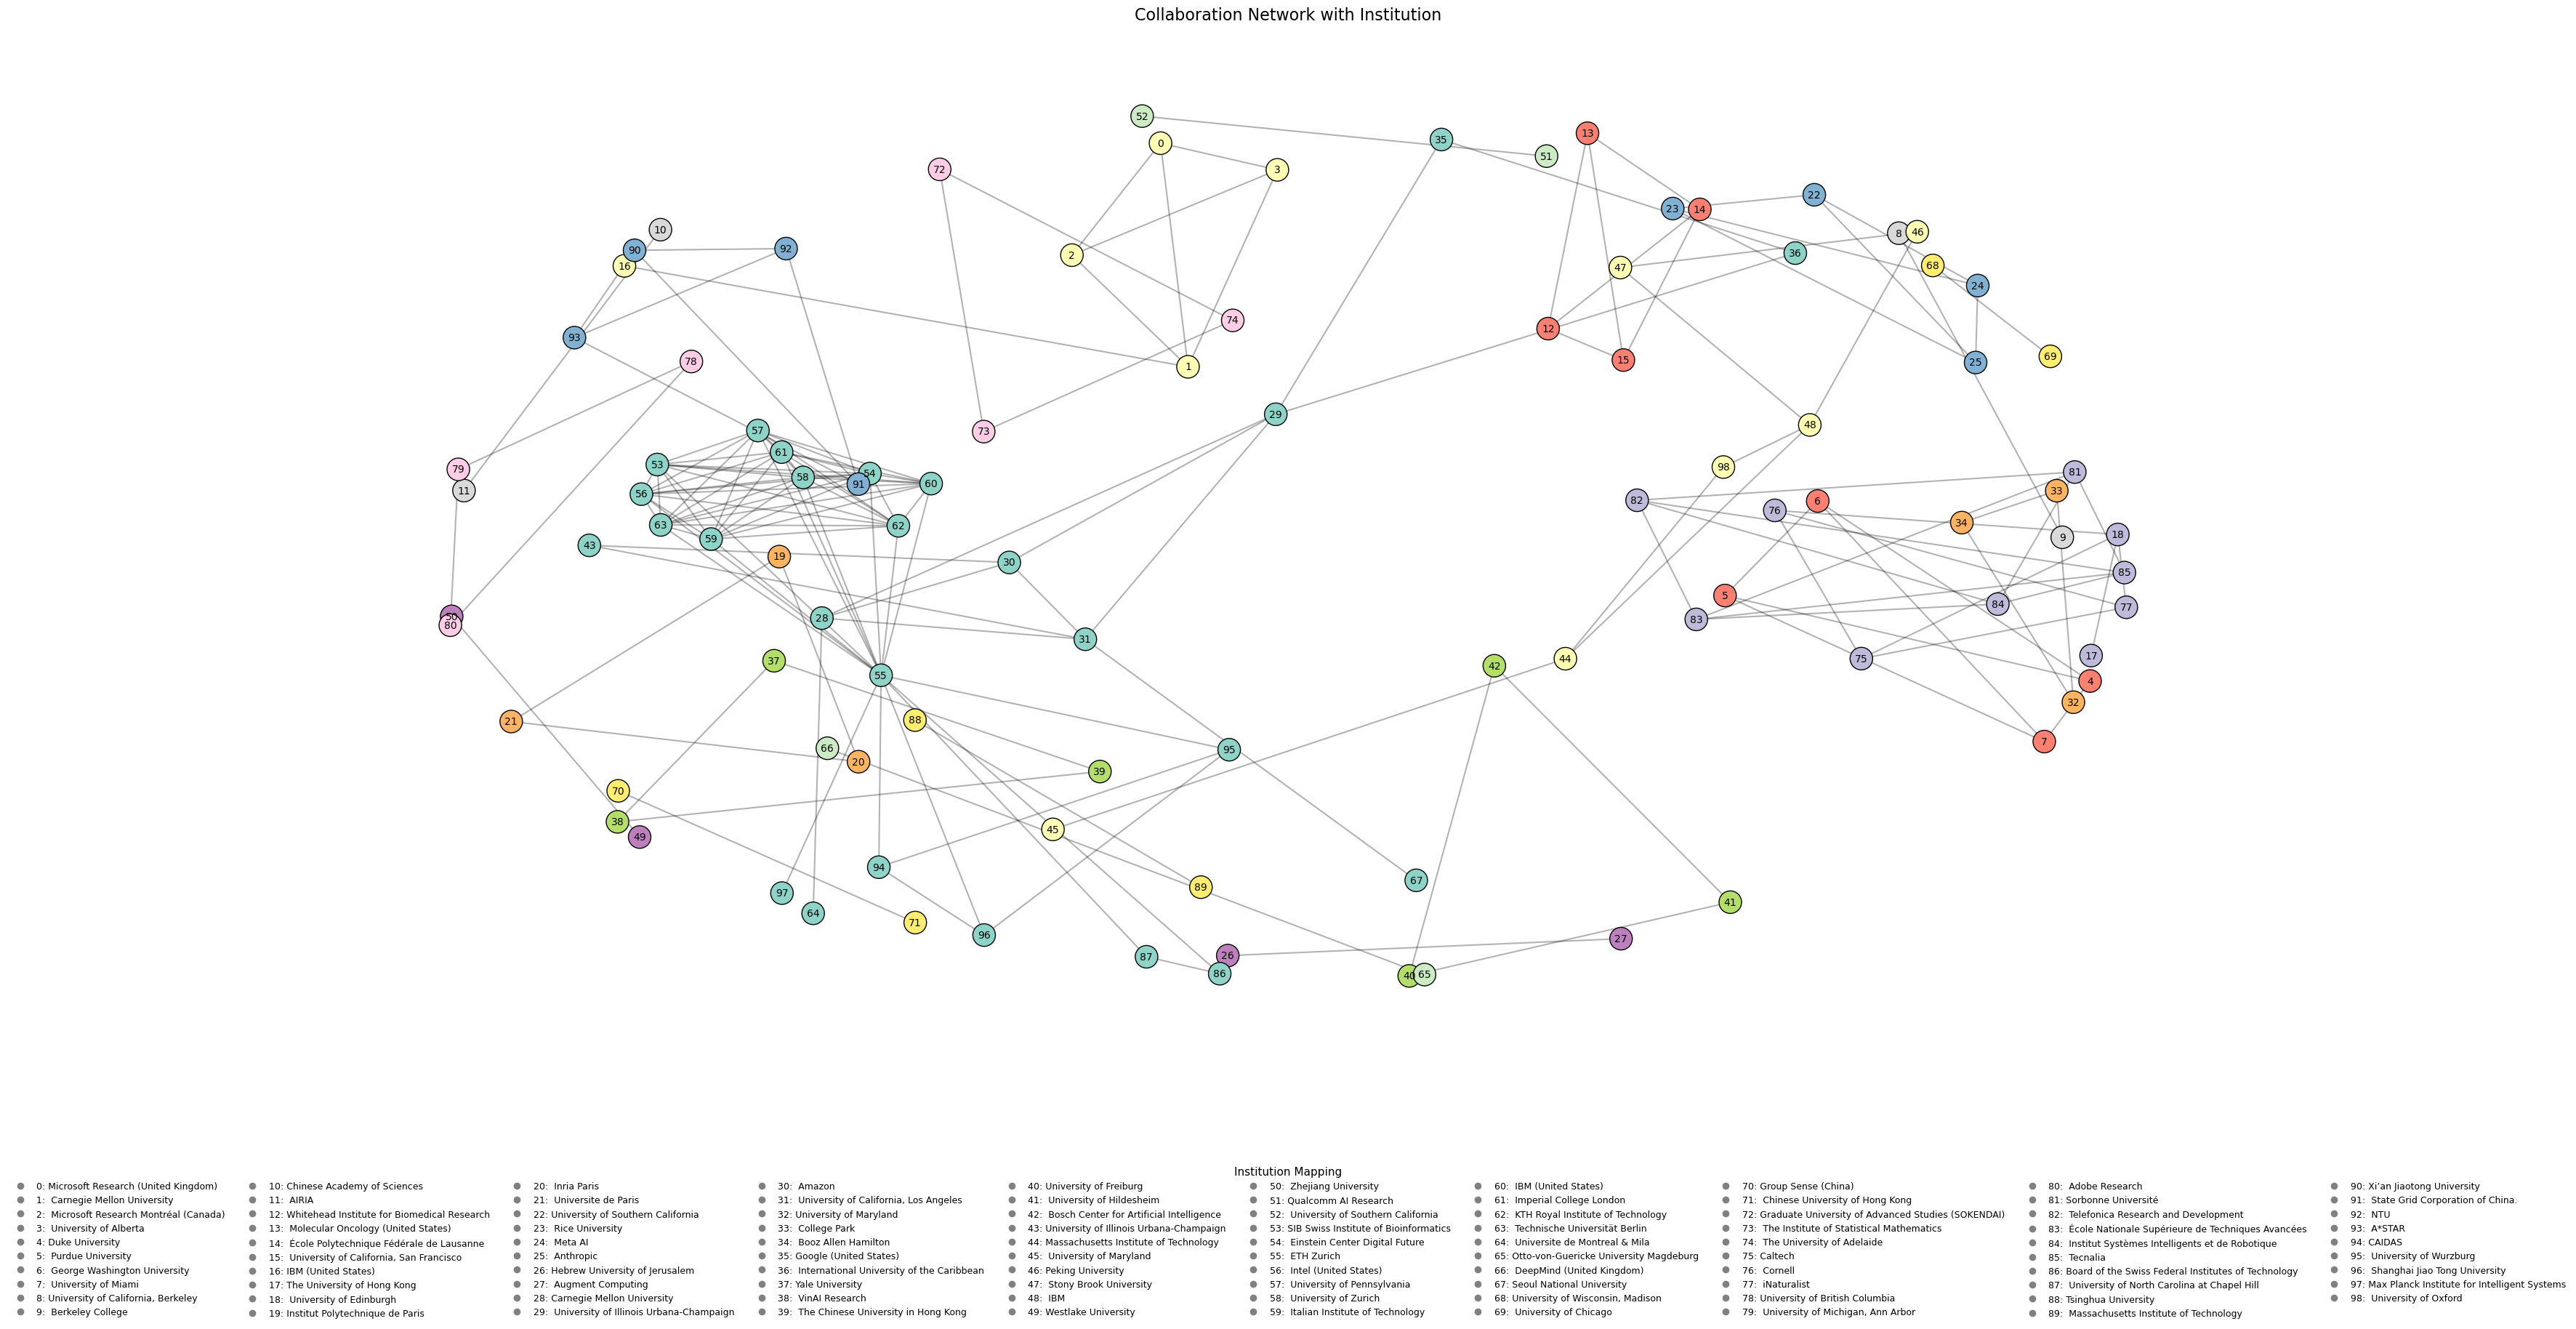

In [4]:
# Read the Excel file
file_path = '/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Data files_Junbo/Data_Network/handle.xlsx'
df = pd.read_excel(file_path)  # Load the Excel file into a DataFrame

# Parse the institution list
df['institutions'] = df['institutions'].str.split(';')  # Split the institutions column by semicolons into lists

# Create a graph
G = nx.Graph()  # Initialize an undirected graph
for _, row in df.iterrows():  # Iterate through each row of data
    institutions = row['institutions']  # Get the institution list for the current row
    for i in range(len(institutions)):  # Iterate through each pair of institutions
        for j in range(i + 1, len(institutions)):
            if G.has_edge(institutions[i], institutions[j]):  # If the edge already exists in the graph
                G[institutions[i]][institutions[j]]['weight'] += 1  # Increase the edge weight
            else:
                G.add_edge(institutions[i], institutions[j], weight=1)  # Otherwise, add a new edge with weight 1

# Institution ID mapping
node_to_id = {node: i for i, node in enumerate(G.nodes())}  # Map institution names to unique IDs
id_to_node = {i: node for node, i in node_to_id.items()}  # Map IDs back to institution names

# Create an ID-based network graph
G_id = nx.Graph()  # Initialize a new undirected graph
for u, v, data in G.edges(data=True):  # Iterate through each edge in the original graph
    G_id.add_edge(node_to_id[u], node_to_id[v], weight=data['weight'])  # Add edges to the ID-based graph

# Compute community detection
communities = list(community.greedy_modularity_communities(G))  # Use the greedy modularity algorithm for community detection
node_to_community = {node_to_id[node]: i for i, com in enumerate(communities) for node in com}  # Map nodes to community IDs

# Compute node positions
pos = nx.spring_layout(G_id, k=3, iterations=300)  # Use the spring layout algorithm to determine node positions

# Plot the graph
plt.figure(figsize=(36, 27))  # Set figure size
colors = [node_to_community[node] for node in G_id.nodes()]  # Assign colors to each node based on community
nx.draw_networkx_nodes(G_id, pos, node_size=500, node_color=colors, cmap=plt.cm.Set3, edgecolors='black')  # Draw nodes
nx.draw_networkx_edges(G_id, pos, alpha=0.3, width=1.5)  # Draw edges
nx.draw_networkx_labels(G_id, pos, font_size=10, font_color='black')  # Draw node labels

# Compute `ncol` to fit the legend
num_nodes = len(id_to_node)  # Get the number of nodes
ncol = min(10, num_nodes // 2)  # Display a maximum of 10 legend items per row

# Add a full legend
legend_labels = [f"{node_id}: {node_name}" for node_id, node_name in id_to_node.items()]  # Generate legend labels
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=8, label=label)
                    for label in legend_labels],
           loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=ncol, fontsize=9, title="Institution Mapping", title_fontsize=11, frameon=False)  # Add legend

# Reserve additional space
plt.subplots_adjust(bottom=0.35)  # Adjust the bottom margin of the plot
plt.title("Collaboration Network with Institution", fontsize=16)  # Set the plot title
plt.axis('off')  # Disable the axes

# Save the image
output_image_path = "/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/Picture/handle_network.png"
plt.savefig(output_image_path, dpi=300, bbox_inches='tight')  # Save the image to the specified path
print(f"Image has been saved to: {output_image_path}") 

# Display the image
plt.show()


Image has been saved to: /Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/Picture/handle_network_Separated.png


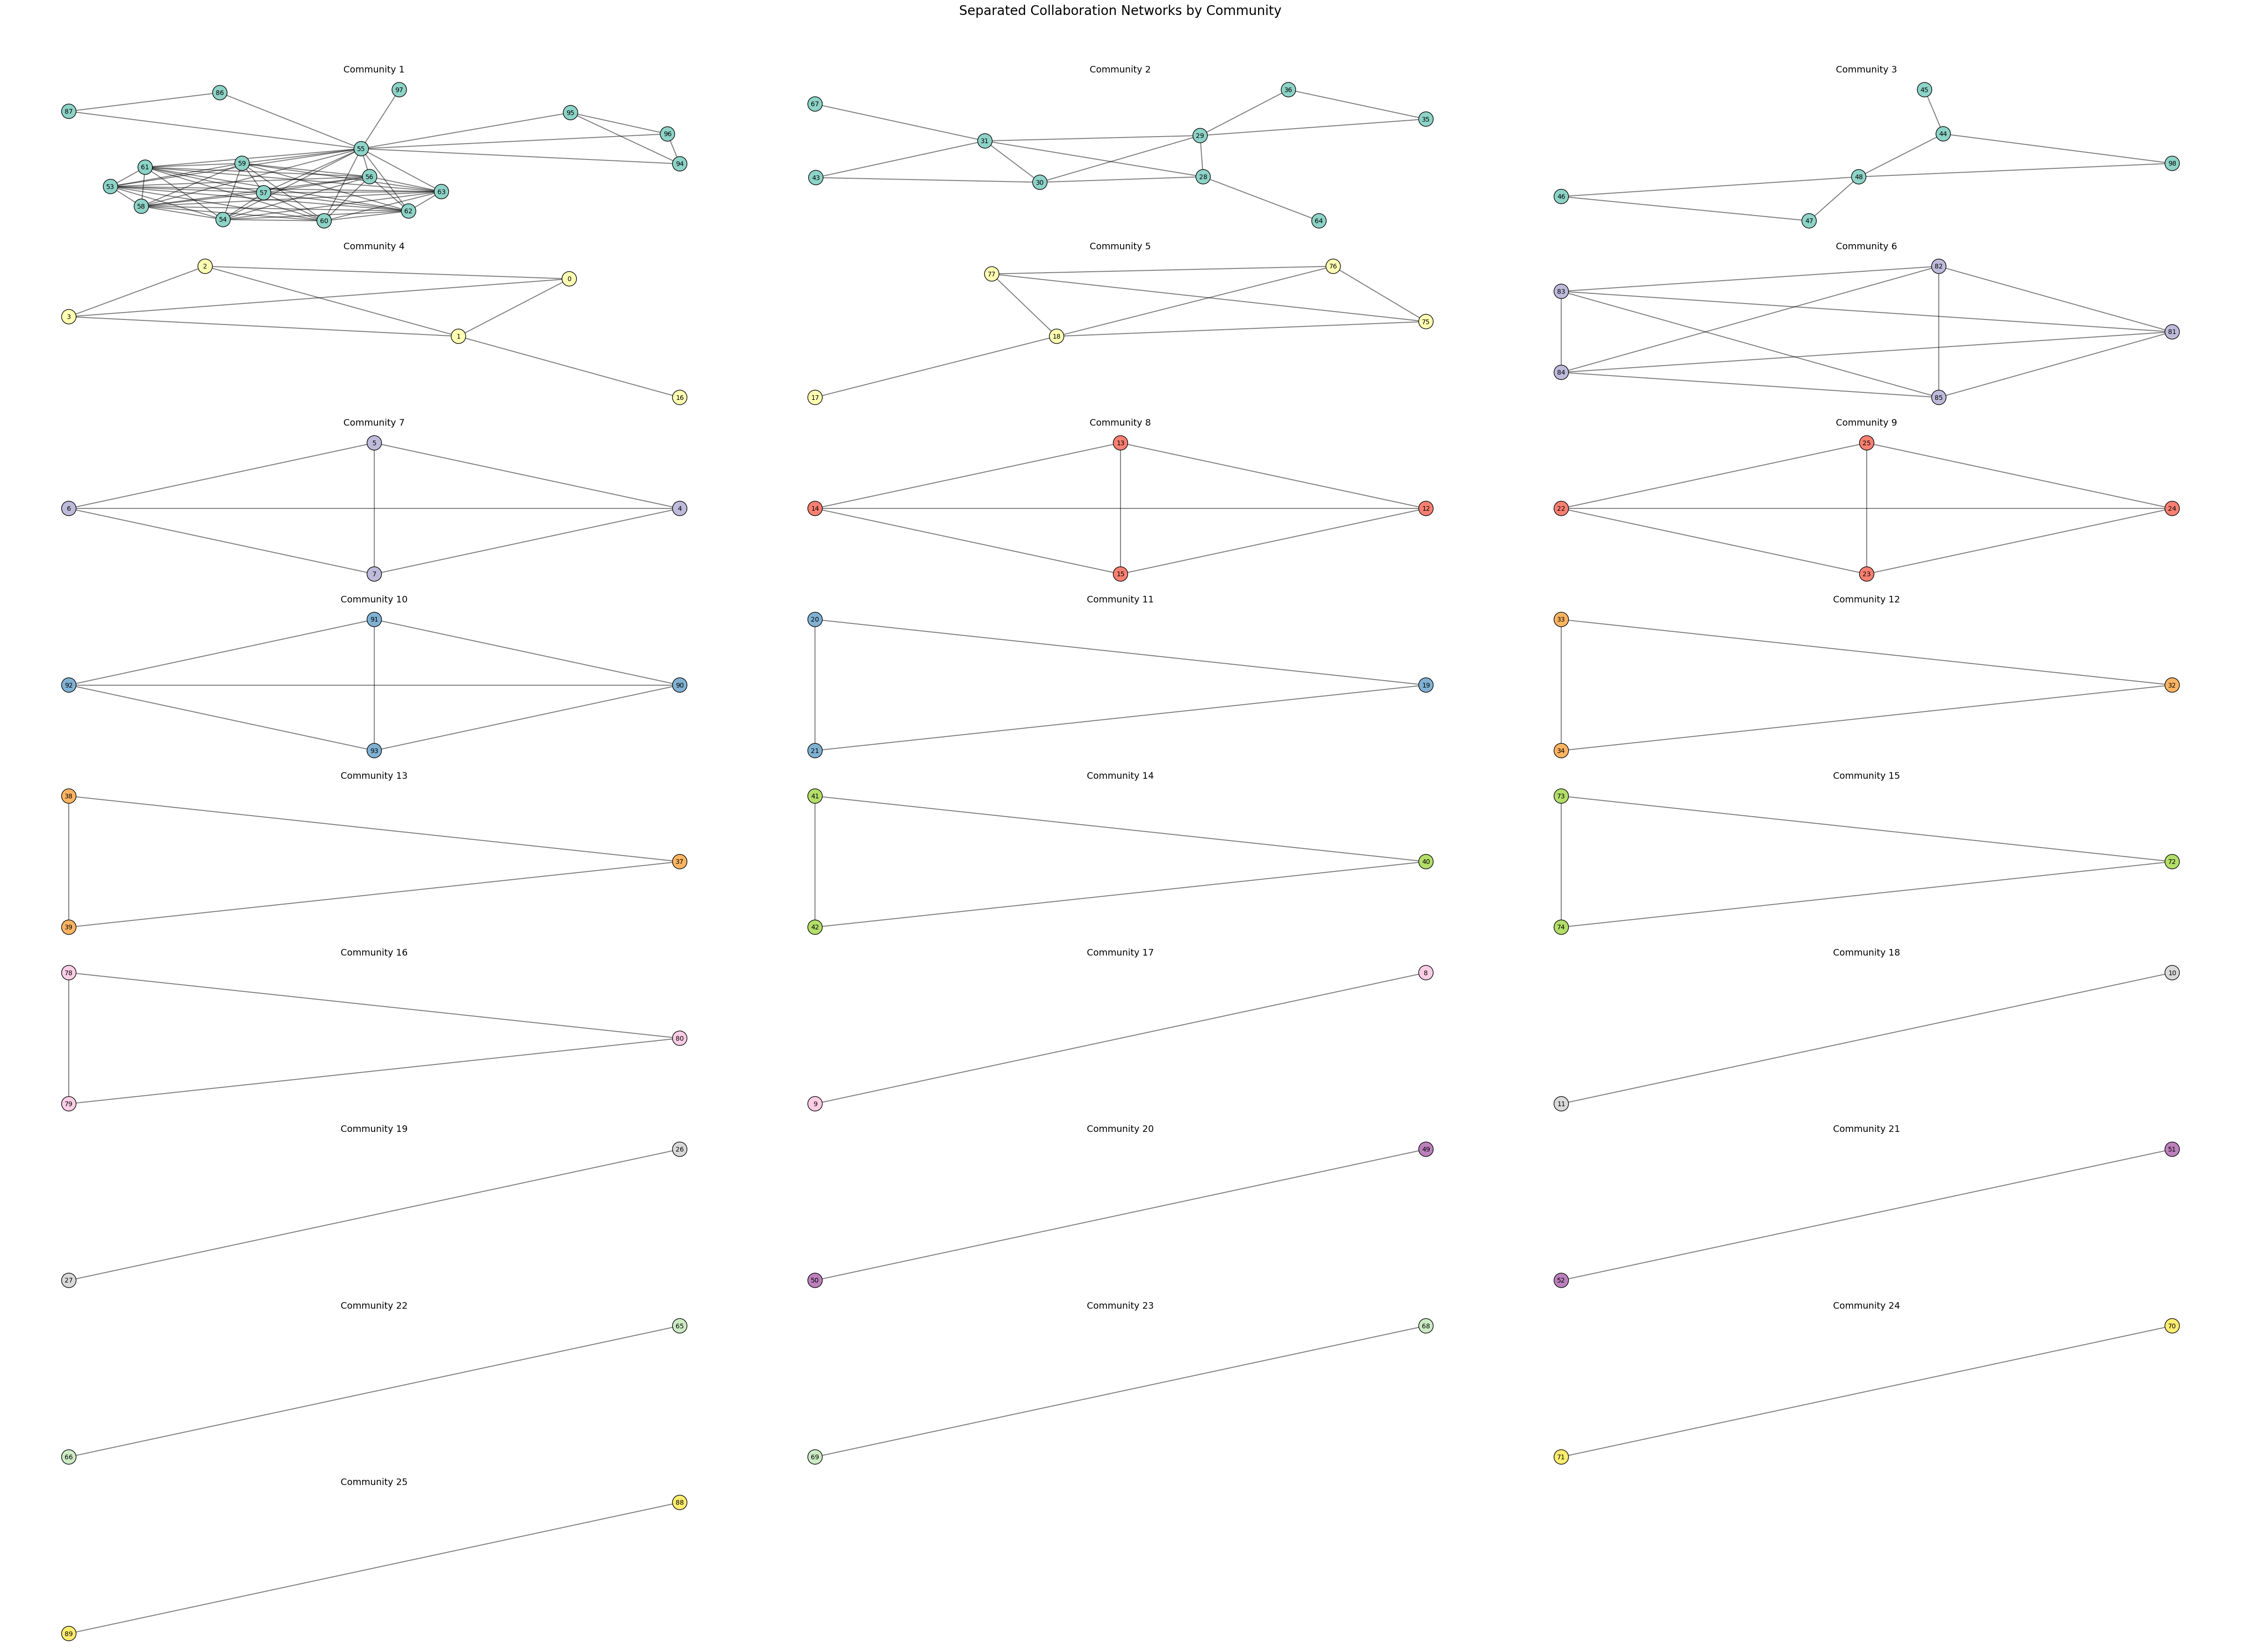

Image has been saved to: /Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/Picture/handle_network_Separated_legend.png


In [5]:
# Read the Excel file
file_path = '/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Data files_Junbo/Data_Network/handle.xlsx'
df = pd.read_excel(file_path)

# Parse the institution list
df['institutions'] = df['institutions'].str.split(';')

# Create a graph
G = nx.Graph()
for _, row in df.iterrows():
    institutions = row['institutions']
    for i in range(len(institutions)):
        for j in range(i + 1, len(institutions)):
            if G.has_edge(institutions[i], institutions[j]):
                G[institutions[i]][institutions[j]]['weight'] += 1
            else:
                G.add_edge(institutions[i], institutions[j], weight=1)

# Institution ID mapping
node_to_id = {node: i for i, node in enumerate(G.nodes())}
id_to_node = {i: node for node, i in node_to_id.items()}

# Create an ID-based network graph
G_id = nx.Graph()
for u, v, data in G.edges(data=True):
    G_id.add_edge(node_to_id[u], node_to_id[v], weight=data['weight'])

# Compute community detection
communities = list(community.greedy_modularity_communities(G))
node_to_community = {node_to_id[node]: i for i, com in enumerate(communities) for node in com}

# Extract subgraphs for different communities
community_graphs = []
for com in communities:
    subgraph = G_id.subgraph([node_to_id[node] for node in com])
    community_graphs.append(subgraph)

# Set up the layout for the subplot
num_communities = len(community_graphs)
cols = 3  # Maximum of 3 subplots per row
rows = (num_communities // cols) + (num_communities % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(48, 36))
axes = axes.flatten()  # Handle different numbers of subplots

# Color mapping
cmap = plt.cm.Set3
color_map = {i: cmap(i / num_communities) for i in range(num_communities)}

# Iterate through each community and plot sub-networks
for i, sub_G in enumerate(community_graphs):
    ax = axes[i]
    pos = nx.kamada_kawai_layout(sub_G)  # Distribute nodes evenly within communities

    colors = [color_map[i] for _ in sub_G.nodes()]
    nx.draw_networkx_nodes(sub_G, pos, node_size=500, node_color=colors, edgecolors='black', ax=ax)
    nx.draw_networkx_edges(sub_G, pos, alpha=0.5, width=1.5, ax=ax)
    nx.draw_networkx_labels(sub_G, pos, font_size=10, font_color='black', ax=ax)

    ax.set_title(f"Community {i + 1}", fontsize=14)
    ax.axis('off')

# Remove extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Separated Collaboration Networks by Community", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
output_image_path = "/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/Picture/handle_network_Separated.png"
plt.savefig(output_image_path, dpi=300, bbox_inches='tight')  # Save the image to the specified path
print(f"Image has been saved to: {output_image_path}") 
plt.show()

# Additional plot for the complete legend
fig_legend, ax_legend = plt.subplots(figsize=(24, 2))
legend_labels = [f"{node_id}: {node_name}" for node_id, node_name in id_to_node.items()]
ax_legend.axis("off")

ax_legend.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label=label)
    for label in legend_labels
], loc='center', ncol=8, fontsize=10, title="Institution Mapping", title_fontsize=12, frameon=False)

output_image_path = "/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/Picture/handle_network_Separated_legend.png"
plt.savefig(output_image_path, dpi=300, bbox_inches='tight')  # Save the image to the specified path
print(f"Image has been saved to: {output_image_path}") 

plt.show()

Image has been saved to: /Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/Picture/ICM_network.png


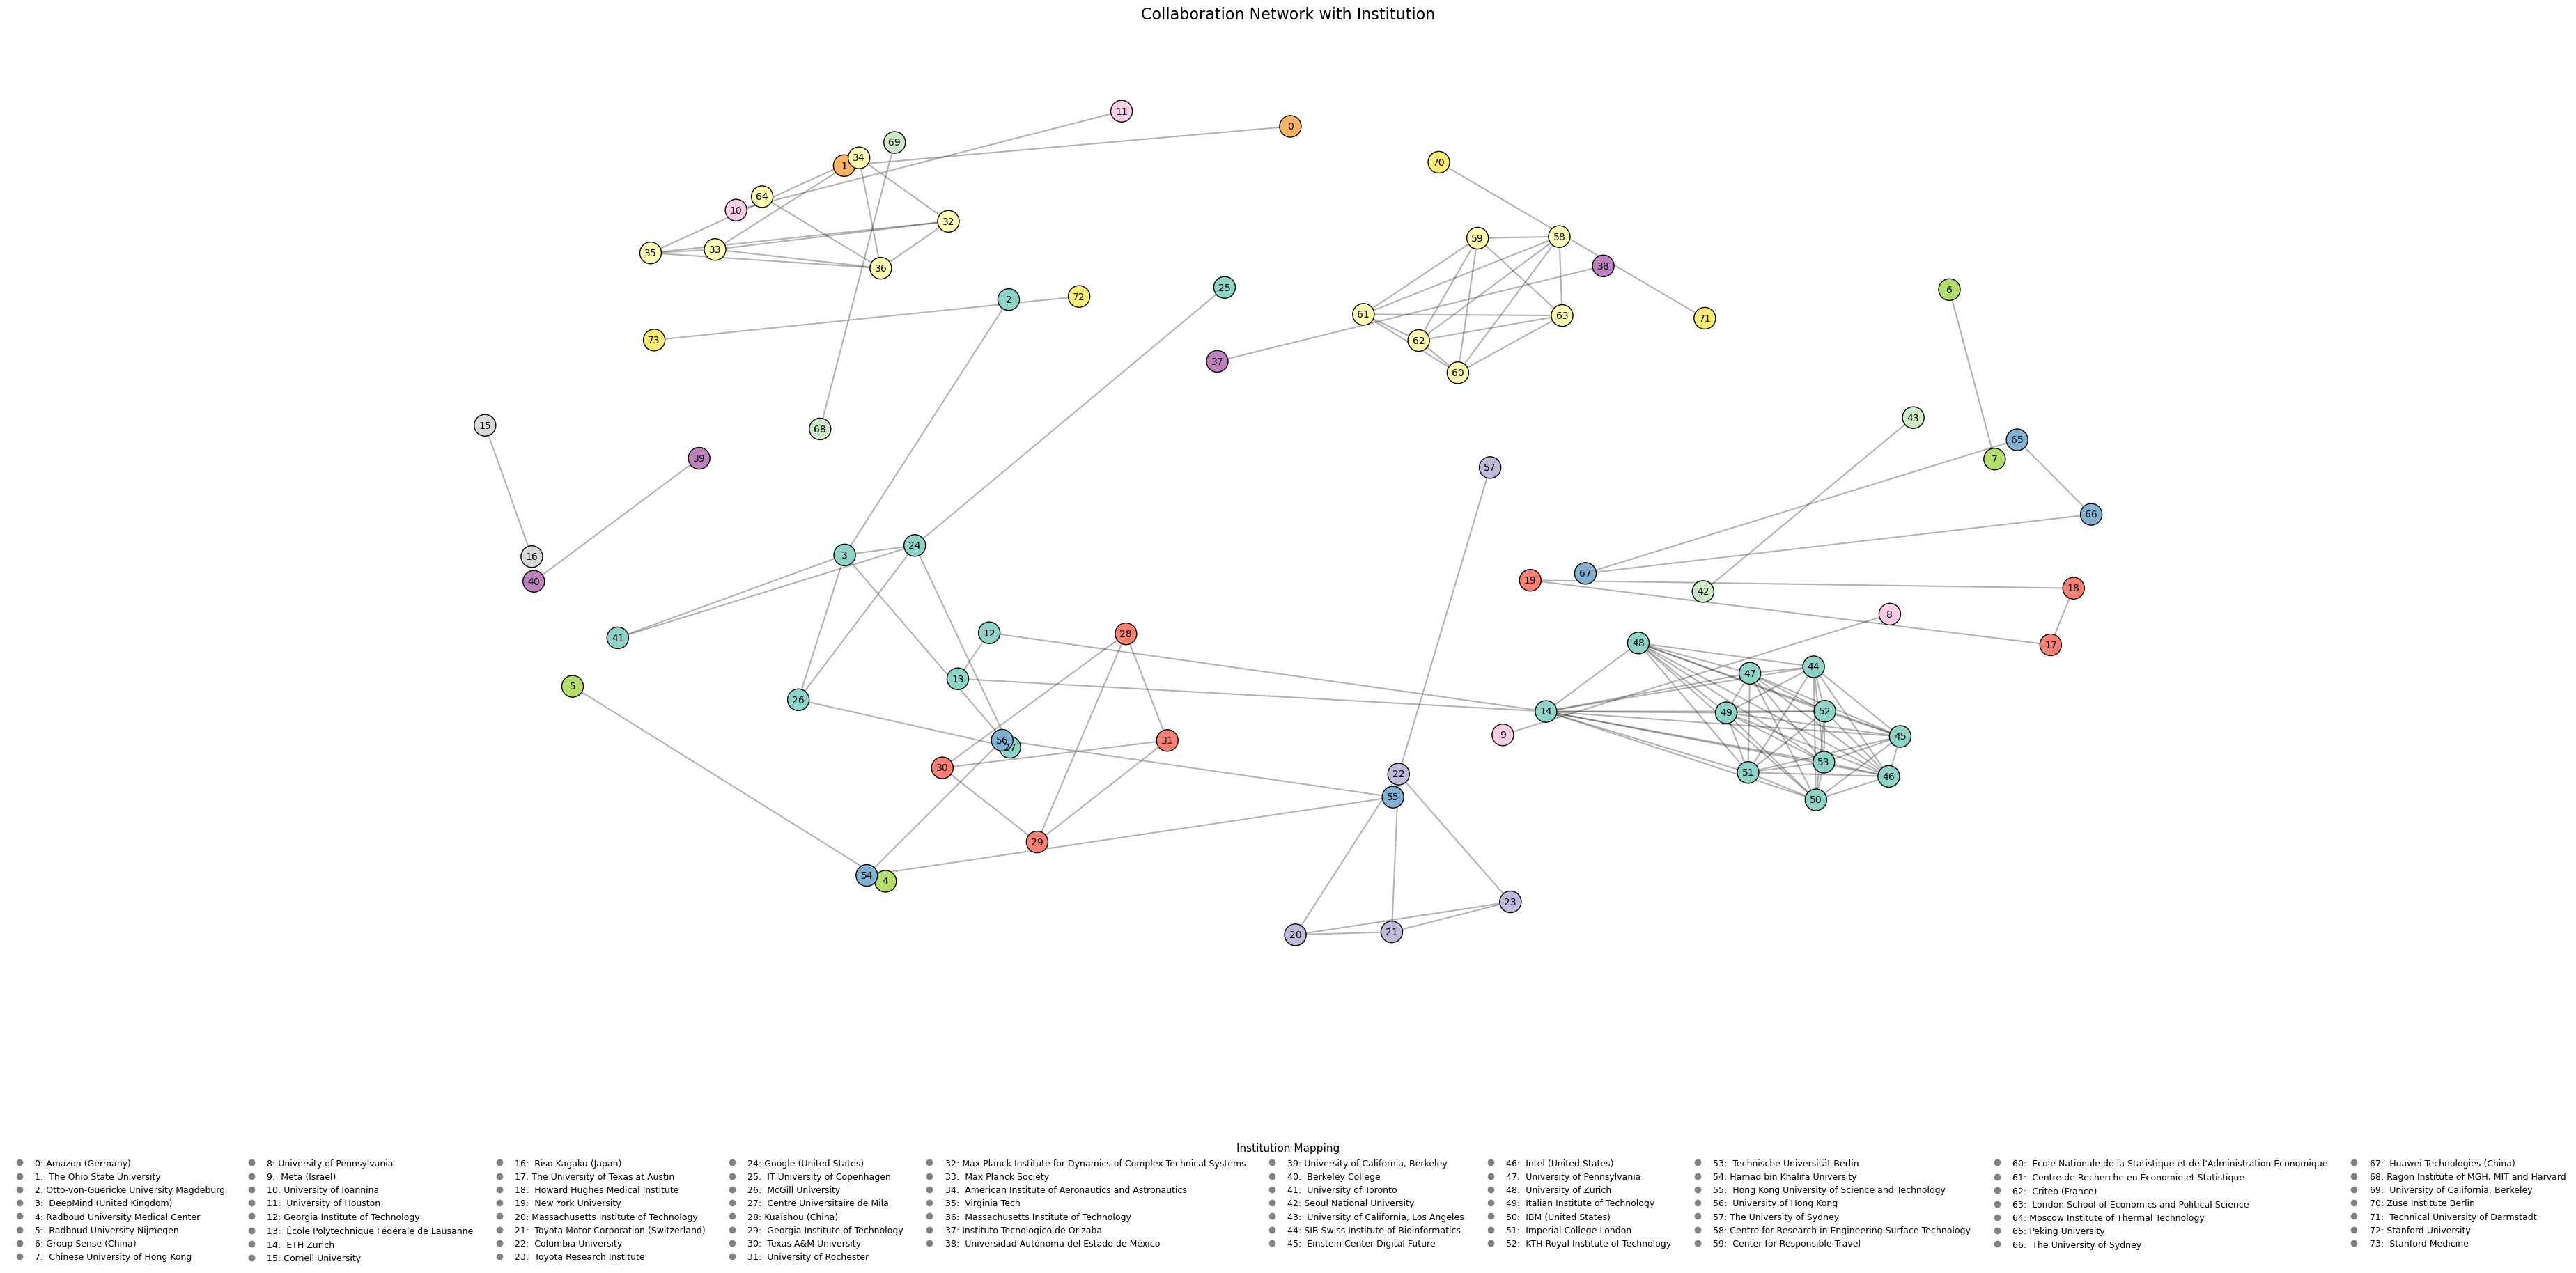

In [6]:
# Read the Excel file
file_path = '/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Data files_Junbo/Data_Network/Sample_ICM_institutions.xlsx'
df = pd.read_excel(file_path)  # Load the Excel file into a DataFrame

# Parse the institution list
df['institutions'] = df['institutions'].str.split(';')  # Split the institutions column by semicolons into lists

# Create a graph
G = nx.Graph()  # Initialize an undirected graph
for _, row in df.iterrows():  # Iterate through each row of data
    institutions = row['institutions']  # Get the institution list for the current row
    for i in range(len(institutions)):  # Iterate through each pair of institutions
        for j in range(i + 1, len(institutions)):
            if G.has_edge(institutions[i], institutions[j]):  # If the edge already exists in the graph
                G[institutions[i]][institutions[j]]['weight'] += 1  # Increase the edge weight
            else:
                G.add_edge(institutions[i], institutions[j], weight=1)  # Otherwise, add a new edge with weight 1

# Institution ID mapping
node_to_id = {node: i for i, node in enumerate(G.nodes())}  # Map institution names to unique IDs
id_to_node = {i: node for node, i in node_to_id.items()}  # Map IDs back to institution names

# Create an ID-based network graph
G_id = nx.Graph()  # Initialize a new undirected graph
for u, v, data in G.edges(data=True):  # Iterate through each edge in the original graph
    G_id.add_edge(node_to_id[u], node_to_id[v], weight=data['weight'])  # Add edges to the ID-based graph

# Compute community detection
communities = list(community.greedy_modularity_communities(G))  # Use the greedy modularity algorithm for community detection
node_to_community = {node_to_id[node]: i for i, com in enumerate(communities) for node in com}  # Map nodes to community IDs

# Compute node positions
pos = nx.spring_layout(G_id, k=3, iterations=300)  # Use the spring layout algorithm to determine node positions

# Plot the graph
plt.figure(figsize=(36, 27))  # Set figure size
colors = [node_to_community[node] for node in G_id.nodes()]  # Assign colors to each node based on community
nx.draw_networkx_nodes(G_id, pos, node_size=500, node_color=colors, cmap=plt.cm.Set3, edgecolors='black')  # Draw nodes
nx.draw_networkx_edges(G_id, pos, alpha=0.3, width=1.5)  # Draw edges
nx.draw_networkx_labels(G_id, pos, font_size=10, font_color='black')  # Draw node labels

# Compute `ncol` to fit the legend
num_nodes = len(id_to_node)  # Get the number of nodes
ncol = min(10, num_nodes // 2)  # Display a maximum of 10 legend items per row

# Add a full legend
legend_labels = [f"{node_id}: {node_name}" for node_id, node_name in id_to_node.items()]  # Generate legend labels
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=8, label=label)
                    for label in legend_labels],
           loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=ncol, fontsize=9, title="Institution Mapping", title_fontsize=11, frameon=False)  # Add legend

# Reserve additional space
plt.subplots_adjust(bottom=0.35)  # Adjust the bottom margin of the plot
plt.title("Collaboration Network with Institution", fontsize=16)  # Set the plot title
plt.axis('off')  # Disable the axes

# Save the image
output_image_path = "/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/Picture/ICM_network.png"
plt.savefig(output_image_path, dpi=300, bbox_inches='tight')  # Save the image to the specified path
print(f"Image has been saved to: {output_image_path}") 

# Display the image
plt.show()


Image has been saved to: /Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/Picture/ICML_network_Separated.png


Image has been saved to: /Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/Picture/ICML_network_Separated_legend.png


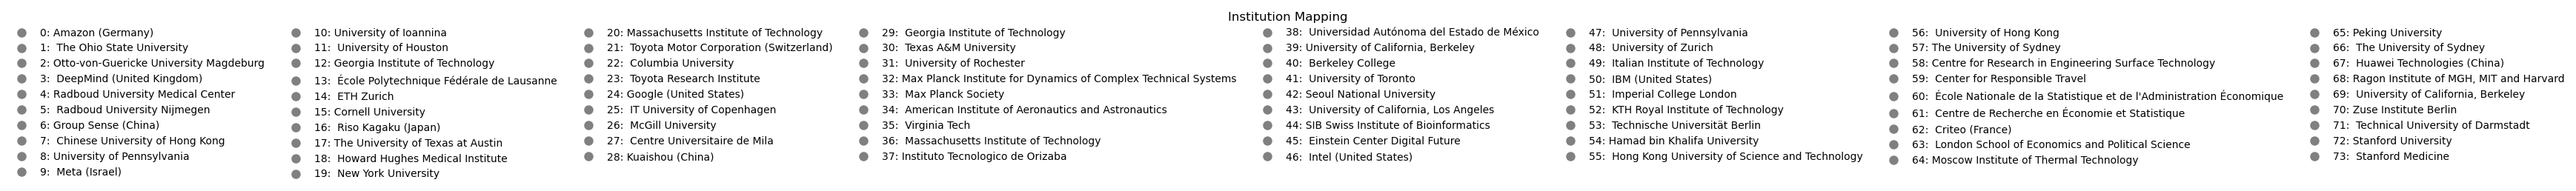

In [7]:
# Read the Excel file
file_path = '/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Data files_Junbo/Data_Network/Sample_ICM_institutions.xlsx'
df = pd.read_excel(file_path)

# Parse the institution list
df['institutions'] = df['institutions'].str.split(';')

# Create a graph
G = nx.Graph()
for _, row in df.iterrows():
    institutions = row['institutions']
    for i in range(len(institutions)):
        for j in range(i + 1, len(institutions)):
            if G.has_edge(institutions[i], institutions[j]):
                G[institutions[i]][institutions[j]]['weight'] += 1
            else:
                G.add_edge(institutions[i], institutions[j], weight=1)

# Institution ID mapping
node_to_id = {node: i for i, node in enumerate(G.nodes())}
id_to_node = {i: node for node, i in node_to_id.items()}

# Create an ID-based network graph
G_id = nx.Graph()
for u, v, data in G.edges(data=True):
    G_id.add_edge(node_to_id[u], node_to_id[v], weight=data['weight'])

# Compute community detection
communities = list(community.greedy_modularity_communities(G))
node_to_community = {node_to_id[node]: i for i, com in enumerate(communities) for node in com}

# Extract subgraphs for different communities
community_graphs = []
for com in communities:
    subgraph = G_id.subgraph([node_to_id[node] for node in com])
    community_graphs.append(subgraph)

# Set up the layout for the subplot
num_communities = len(community_graphs)
cols = 3  # Maximum of 3 subplots per row
rows = (num_communities // cols) + (num_communities % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(48, 36))
axes = axes.flatten()  # Handle different numbers of subplots

# Color mapping
cmap = plt.cm.Set3
color_map = {i: cmap(i / num_communities) for i in range(num_communities)}

# Iterate through each community and plot sub-networks
for i, sub_G in enumerate(community_graphs):
    ax = axes[i]
    pos = nx.kamada_kawai_layout(sub_G)  # Distribute nodes evenly within communities

    colors = [color_map[i] for _ in sub_G.nodes()]
    nx.draw_networkx_nodes(sub_G, pos, node_size=500, node_color=colors, edgecolors='black', ax=ax)
    nx.draw_networkx_edges(sub_G, pos, alpha=0.5, width=1.5, ax=ax)
    nx.draw_networkx_labels(sub_G, pos, font_size=10, font_color='black', ax=ax)

    ax.set_title(f"Community {i + 1}", fontsize=14)
    ax.axis('off')

# Remove extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Separated Collaboration Networks by Community", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
output_image_path = "/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/Picture/ICML_network_Separated.png"
plt.savefig(output_image_path, dpi=300, bbox_inches='tight')  # Save the image to the specified path
print(f"Image has been saved to: {output_image_path}") 
plt.show()

# Additional plot for the complete legend
fig_legend, ax_legend = plt.subplots(figsize=(24, 2))
legend_labels = [f"{node_id}: {node_name}" for node_id, node_name in id_to_node.items()]
ax_legend.axis("off")

ax_legend.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label=label)
    for label in legend_labels
], loc='center', ncol=8, fontsize=10, title="Institution Mapping", title_fontsize=12, frameon=False)

output_image_path = "/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/Picture/ICML_network_Separated_legend.png"
plt.savefig(output_image_path, dpi=300, bbox_inches='tight')  # Save the image to the specified path
print(f"Image has been saved to: {output_image_path}") 

plt.show()

In [10]:
# Read the Excel file
file_path = '/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Data files_Junbo/Data_Network/handle.xlsx'
df = pd.read_excel(file_path)  # Load the Excel file into a DataFrame

# Parse the institution list
df['institutions'] = df['institutions'].str.split(';')  # Split the institutions column by semicolons into lists

# Create a graph
G = nx.Graph()  # Initialize an undirected graph
for _, row in df.iterrows():  # Iterate through each row of data
    institutions = row['institutions']  # Get the institution list for the current row
    for i in range(len(institutions)):  # Iterate through each pair of institutions
        for j in range(i + 1, len(institutions)):
            if G.has_edge(institutions[i], institutions[j]):  # If the edge already exists in the graph
                G[institutions[i]][institutions[j]]['weight'] += 1  # Increase the edge weight
            else:
                G.add_edge(institutions[i], institutions[j], weight=1)  # Otherwise, add a new edge with weight 1

# Calculate centrality measures
# 1. Degree Centrality
degree_centrality = nx.degree_centrality(G)

# 2. Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# 3. Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# 4. Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Create a DataFrame to store centrality results
centrality_df = pd.DataFrame({
    'Institution': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Eigenvector Centrality': list(eigenvector_centrality.values())
})

# Sort by each centrality measure and get the top 10 institutions
top_10_degree = centrality_df.sort_values(by='Degree Centrality', ascending=False).head(10)
top_10_closeness = centrality_df.sort_values(by='Closeness Centrality', ascending=False).head(10)
top_10_betweenness = centrality_df.sort_values(by='Betweenness Centrality', ascending=False).head(10)
top_10_eigenvector = centrality_df.sort_values(by='Eigenvector Centrality', ascending=False).head(10)

# Print the results
print("Top 10 Institutions by Degree Centrality:")
print(top_10_degree[['Institution', 'Degree Centrality']])
print("\nTop 10 Institutions by Closeness Centrality:")
print(top_10_closeness[['Institution', 'Closeness Centrality']])
print("\nTop 10 Institutions by Betweenness Centrality:")
print(top_10_betweenness[['Institution', 'Betweenness Centrality']])
print("\nTop 10 Institutions by Eigenvector Centrality:")
print(top_10_eigenvector[['Institution', 'Eigenvector Centrality']])

# Save centrality results to a CSV file
centrality_output_path = "/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/tempdata/handle_centrality_results.csv"
centrality_df.to_csv(centrality_output_path, index=False)
print(f"\nCentrality results have been saved to: {centrality_output_path}")

Top 10 Institutions by Degree Centrality:
                              Institution  Degree Centrality
55                             ETH Zurich           0.163265
56                  Intel (United States)           0.102041
60                    IBM (United States)           0.102041
57             University of Pennsylvania           0.102041
63          Technische Universität Berlin           0.102041
62      KTH Royal Institute of Technology           0.102041
61                Imperial College London           0.102041
59        Italian Institute of Technology           0.102041
58                   University of Zurich           0.102041
53  SIB Swiss Institute of Bioinformatics           0.102041

Top 10 Institutions by Closeness Centrality:
                              Institution  Closeness Centrality
55                             ETH Zurich              0.163265
60                    IBM (United States)              0.118738
63          Technische Universität Berlin        

In [11]:
# Read the Excel file
file_path = '/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Data files_Junbo/Data_Network/Sample_ICM_institutions.xlsx'
df = pd.read_excel(file_path)  # Load the Excel file into a DataFrame

# Parse the institution list
df['institutions'] = df['institutions'].str.split(';')  # Split the institutions column by semicolons into lists

# Create a graph
G = nx.Graph()  # Initialize an undirected graph
for _, row in df.iterrows():  # Iterate through each row of data
    institutions = row['institutions']  # Get the institution list for the current row
    for i in range(len(institutions)):  # Iterate through each pair of institutions
        for j in range(i + 1, len(institutions)):
            if G.has_edge(institutions[i], institutions[j]):  # If the edge already exists in the graph
                G[institutions[i]][institutions[j]]['weight'] += 1  # Increase the edge weight
            else:
                G.add_edge(institutions[i], institutions[j], weight=1)  # Otherwise, add a new edge with weight 1

# Calculate centrality measures
# 1. Degree Centrality
degree_centrality = nx.degree_centrality(G)

# 2. Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# 3. Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# 4. Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Create a DataFrame to store centrality results
centrality_df = pd.DataFrame({
    'Institution': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Eigenvector Centrality': list(eigenvector_centrality.values())
})

# Sort by each centrality measure and get the top 10 institutions
top_10_degree = centrality_df.sort_values(by='Degree Centrality', ascending=False).head(10)
top_10_closeness = centrality_df.sort_values(by='Closeness Centrality', ascending=False).head(10)
top_10_betweenness = centrality_df.sort_values(by='Betweenness Centrality', ascending=False).head(10)
top_10_eigenvector = centrality_df.sort_values(by='Eigenvector Centrality', ascending=False).head(10)

# Print the results
print("Top 10 Institutions by Degree Centrality:")
print(top_10_degree[['Institution', 'Degree Centrality']])
print("\nTop 10 Institutions by Closeness Centrality:")
print(top_10_closeness[['Institution', 'Closeness Centrality']])
print("\nTop 10 Institutions by Betweenness Centrality:")
print(top_10_betweenness[['Institution', 'Betweenness Centrality']])
print("\nTop 10 Institutions by Eigenvector Centrality:")
print(top_10_eigenvector[['Institution', 'Eigenvector Centrality']])

# Save centrality results to a CSV file
centrality_output_path = "/Users/alan/Desktop/海外申请/Coding test/EPIC-CHINA/Code files_Junbo/Result/tempdata/ICML_centrality_results.csv"
centrality_df.to_csv(centrality_output_path, index=False)
print(f"\nCentrality results have been saved to: {centrality_output_path}")

Top 10 Institutions by Degree Centrality:
                              Institution  Degree Centrality
14                             ETH Zurich           0.164384
48                   University of Zurich           0.136986
44  SIB Swiss Institute of Bioinformatics           0.136986
45         Einstein Center Digital Future           0.136986
46                  Intel (United States)           0.136986
47             University of Pennsylvania           0.136986
53          Technische Universität Berlin           0.136986
49        Italian Institute of Technology           0.136986
51                Imperial College London           0.136986
52      KTH Royal Institute of Technology           0.136986

Top 10 Institutions by Closeness Centrality:
                              Institution  Closeness Centrality
14                             ETH Zurich              0.164384
50                    IBM (United States)              0.140900
46                  Intel (United States)        